# LSTM architecture

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from itertools import product

In [4]:
# Read data and define input and output
data = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/Data formatting/Dataset_scaled_denoised.xlsx')
data = data[data['I'] == 1.6]
X = data.iloc[1:,:9]

In [6]:
# Prepare input and output sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length])
        y.append(data.iloc[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 20  # Define the sequence length
X_seq, y_seq = create_sequences(X, seq_length)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [7]:
# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(y_train.shape[1])  # Output layer with number of neurons equal to number of output features
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)




Epoch 1/50

2880/2880 [==============================] - 18s 6ms/step - loss: 0.0059 - val_loss: 1.9327e-04
Epoch 2/50
2880/2880 [==============================] - 17s 6ms/step - loss: 1.1773e-04 - val_loss: 1.8999e-04
Epoch 3/50
2880/2880 [==============================] - 17s 6ms/step - loss: 1.0523e-04 - val_loss: 1.7408e-04
Epoch 4/50
2880/2880 [==============================] - 17s 6ms/step - loss: 7.7500e-05 - val_loss: 1.8330e-04
Epoch 5/50
2880/2880 [==============================] - 17s 6ms/step - loss: 5.8378e-05 - val_loss: 1.6353e-04
Epoch 6/50
2880/2880 [==============================] - 17s 6ms/step - loss: 4.4989e-05 - val_loss: 1.7003e-04
Epoch 7/50
2880/2880 [==============================] - 16s 6ms/step - loss: 4.6763e-05 - val_loss: 1.6459e-04
Epoch 8/50
2880/2880 [==============================] - 15s 5ms/step - loss: 3.4809e-05 - val_loss: 1.7159e-04
Epoch 9/50
2880/2880 [==============================] - 16s 6ms/step - loss: 2.9099e-05 - val_loss: 1.6158e-04
Ep

In [10]:
# Make predictions
y_pred = model.predict(X_seq[:20])

1/1 [==============================] - 0s 20ms/step


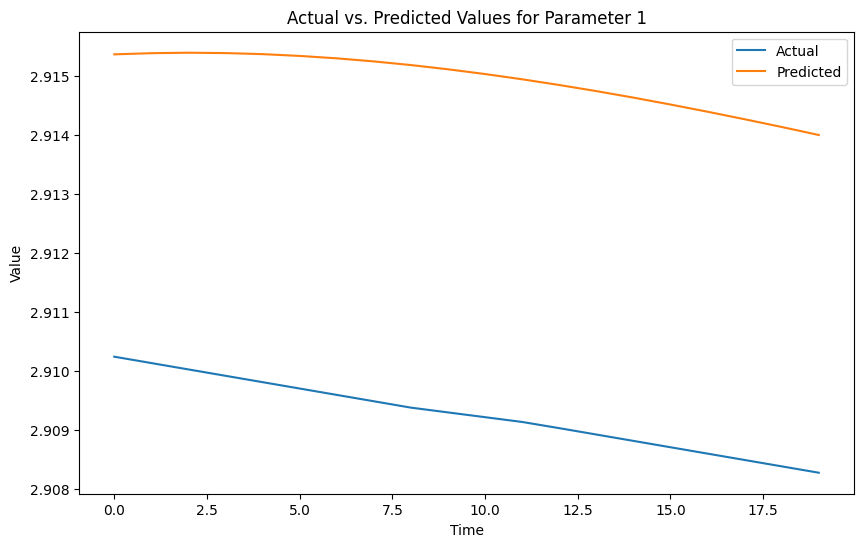

In [12]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(y_seq[20:40, 0], label='Actual')
plt.plot(y_pred[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values for Parameter 1')
plt.legend()
plt.show()